In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("../input/College.csv")

df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


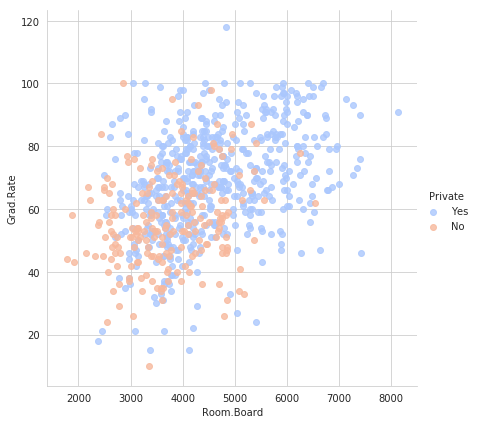

In [3]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)


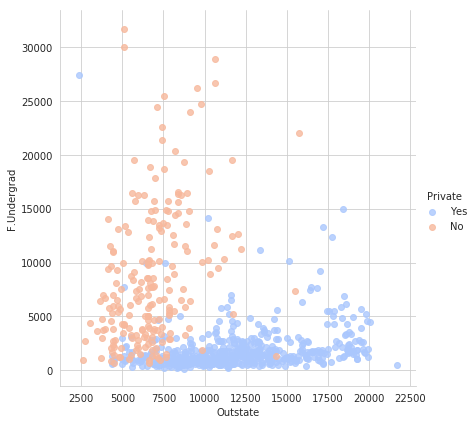

In [6]:


sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)


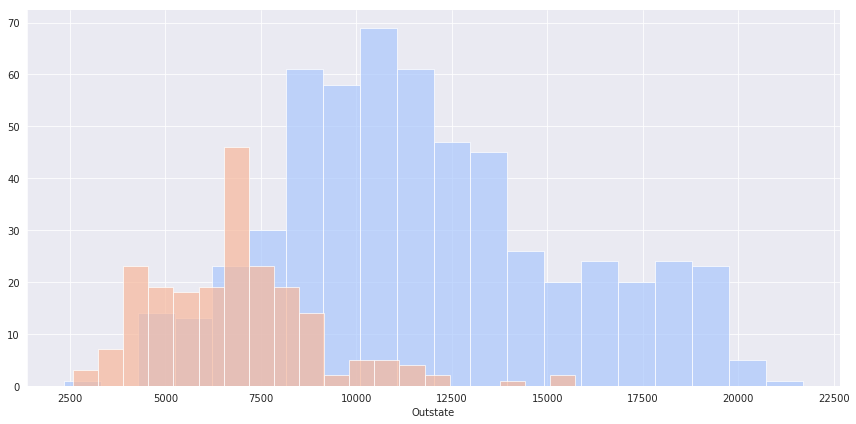

In [7]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)


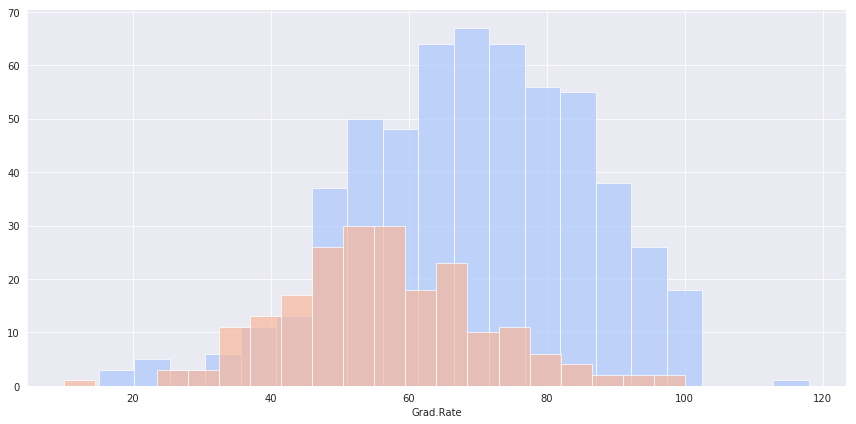

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)


In [9]:

df[df['Grad.Rate'] > 100]
df['Grad.Rate']['Cazenovia College'] = 100
df[df['Grad.Rate'] > 100]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


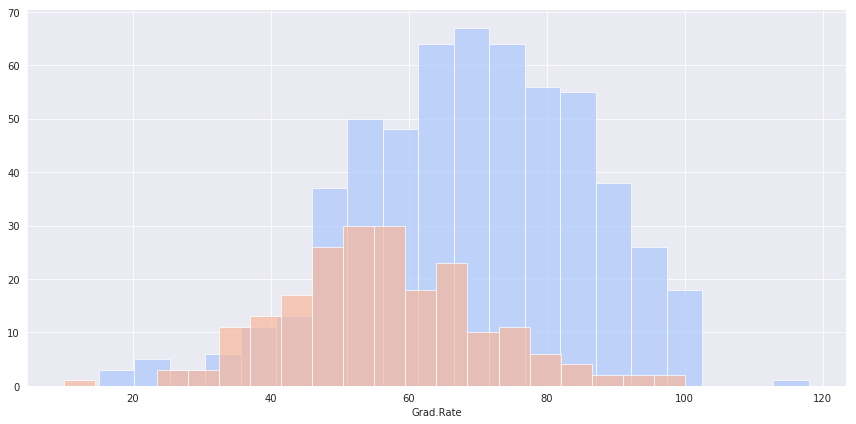

In [10]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)


In [11]:
X = df.drop(['Private', 'Unnamed: 0'],axis=1)

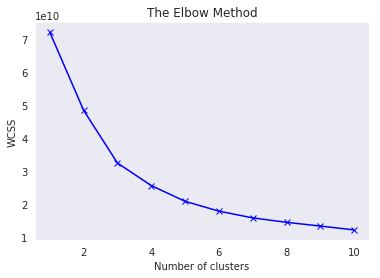

In [12]:

# Using K means clustering

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,"bx-")
plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
